In [88]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
import datetime as dt
import math
import warnings
warnings.filterwarnings('ignore')

In [89]:
read_train_file = pd.read_excel ('E:\\python\\customer_retention_dataset_org.xlsx')
read_train_file.to_csv ('E:\\python\\customer_retention_dataset_org_converted.csv', index = None, header=True)

In [90]:
read_train_file.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [91]:
read_train_file.dtypes

1Gender of respondent                                                   object
2 How old are you?                                                      object
3 Which city do you shop online from?                                   object
4 What is the Pin Code of where you shop online from?                    int64
5 Since How Long You are Shopping Online ?                              object
                                                                         ...  
Longer delivery period                                                  object
Change in website/Application design                                    object
Frequent disruption when moving from one page to another                object
Website is as efficient as before                                       object
Which of the Indian online retailer would you recommend to a friend?    object
Length: 71, dtype: object

In [92]:
read_train_file.head(5)

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"


In [93]:
read_train_file.isnull().sum()

1Gender of respondent                                                   0
2 How old are you?                                                      0
3 Which city do you shop online from?                                   0
4 What is the Pin Code of where you shop online from?                   0
5 Since How Long You are Shopping Online ?                              0
                                                                       ..
Longer delivery period                                                  0
Change in website/Application design                                    0
Frequent disruption when moving from one page to another                0
Website is as efficient as before                                       0
Which of the Indian online retailer would you recommend to a friend?    0
Length: 71, dtype: int64

In [94]:
#WE can see that there are no null values in entire dataset.

<AxesSubplot:>

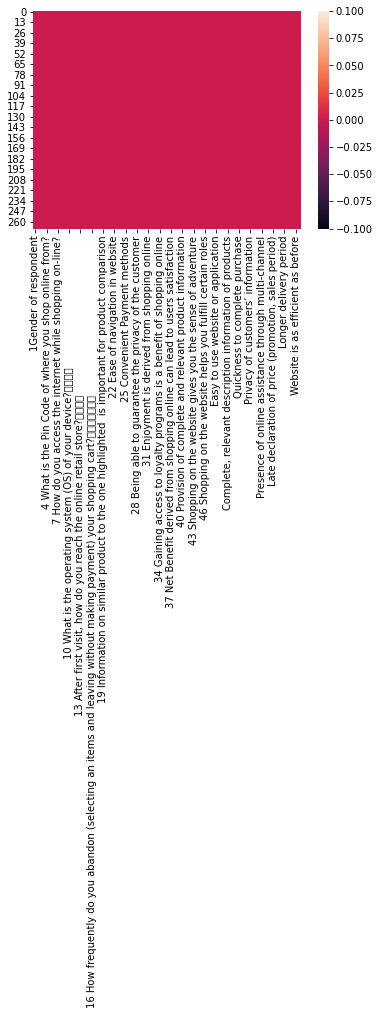

In [95]:
sns.heatmap(read_train_file.isnull()) # heatmap also indicates that there are  no null values in data

In [96]:
read_train_file.describe()

,4 What is the Pin Code of where you shop online from?
count,269.000000
mean,220465.747212
std,140524.341051
min,110008.000000
25%,122018.000000
50%,201303.000000
75%,201310.000000
max,560037.000000


In [97]:
df1 = read_train_file.iloc[:,0:47]

In [98]:
df1.head(5)

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Strongly agree (5),indifferent (3),indifferent (3),Disagree (2),indifferent (3),Agree (4),Agree (4),Strongly agree (5),Agree (4),Strongly agree (5)
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),indifferent (3),indifferent (3),indifferent (3),Strongly agree (5),Strongly agree (5),Strongly agree (5)
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Agree (4),Strongly agree (5),Strongly agree (5),Strongly agree (5),Agree (4),Agree (4),Agree (4),indifferent (3),indifferent (3),Agree (4)
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Agree (4),Agree (4),Agree (4),Strongly agree (5),Agree (4),Agree (4),Strongly agree (5),Agree (4),indifferent (3),Agree (4)
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,Strongly agree (5),Agree (4),Agree (4),Strongly agree (5),Agree (4),indifferent (3),Strongly disagree (1),Strongly agree (5),Strongly disagree (1),Strongly agree (5)


In [99]:
df2 = read_train_file.iloc[:,47:]

In [100]:
df2.head(5)

,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,"Amazon.in, Paytm.com",Paytm.com,Flipkart.com,Flipkart.com,Snapdeal.com,Snapdeal.com,Paytm.com,Paytm.com,Patym.com,Amazon.in,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,"Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com","Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com","Amazon.in, Myntra.com","Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Myntra.com",Myntra.com,"Amazon.com, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com",...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,"Amazon.in, Paytm.com, Myntra.com","Amazon.in, Paytm.com, Myntra.com","Amazon.in, Paytm.com, Myntra.com","Amazon.in, Myntra.com","Amazon.in, Paytm.com, Myntra.com","Amazon.in, Paytm.com","Amazon.in, Paytm.com, Myntra.com","Amazon.com, Paytm.com, Myntra.com","Patym.com, Myntra.com",Amazon.in,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,"Amazon.in, Flipkart.com, Paytm.com, Myntra.com...","Amazon.in, Flipkart.com, Paytm.com, Myntra.com...","Amazon.in, Flipkart.com, Paytm.com, Myntra.com...","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Snapdeal.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.com, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Snapdeal.com",...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,"Amazon.in, Flipkart.com, Paytm.com, Myntra.com...","Amazon.in, Flipkart.com, Paytm.com, Myntra.com...",Myntra.com,Myntra.com,"Amazon.in, Flipkart.com, Paytm.com, Myntra.com...",Amazon.in,"Amazon.in, Paytm.com, Myntra.com","Amazon.com, Flipkart.com, Paytm.com, Myntra.co...","Amazon.in, Flipkart.com, Patym.com, Myntra.com...",Amazon.in,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"


In [101]:
#Here for ease of use and understanding, we have splitted our dataset into 2 parts based on columns wherein 1st part contains 
#first 47 columns of the dataset and second part contains the rest of the columns from dataset.

In [102]:
df2.columns

Index(['From the following, tick any (or all) of the online retailers you have shopped from;                                                                           ',
       'Easy to use website or application',
       'Visual appealing web-page layout', 'Wild variety of product on offer',
       'Complete, relevant description information of products',
       'Fast loading website speed of website and application',
       'Reliability of the website or application',
       'Quickness to complete purchase',
       'Availability of several payment options', 'Speedy order delivery ',
       'Privacy of customers’ information',
       'Security of customer financial information',
       'Perceived Trustworthiness',
       'Presence of online assistance through multi-channel',
       'Longer time to get logged in (promotion, sales period)',
       'Longer time in displaying graphics and photos (promotion, sales period)',
       'Late declaration of price (promotion, sales period)',
    

In [103]:
df1.dtypes

1Gender of respondent                                                                                                                                                                                                  object
2 How old are you?                                                                                                                                                                                                     object
3 Which city do you shop online from?                                                                                                                                                                                  object
4 What is the Pin Code of where you shop online from?                                                                                                                                                                   int64
5 Since How Long You are Shopping Online ?                                                                      

In [105]:
# Here we are doing univariate analysis with df1 dataset

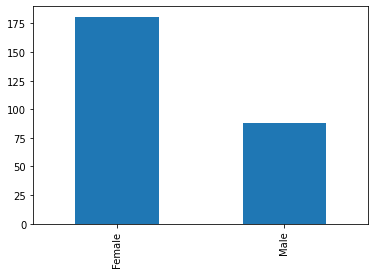

In [106]:
gender = df1["1Gender of respondent"].value_counts()

gender.plot(kind = 'bar')
plt.show()

In [107]:
#We can see that ratio of female online shoppers is quite high, more than double. 

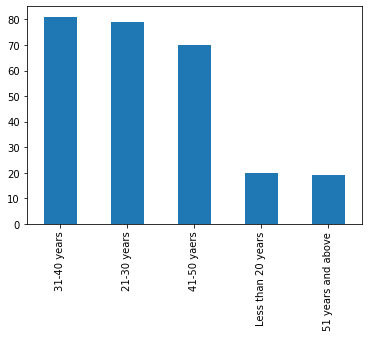

In [108]:
age = df1["2 How old are you? "].value_counts()

age.plot(kind = 'bar')
plt.show()

In [109]:
#From above graph we can see people within age group of 21 to 50 forms the major portion of online shoppers.
#We can infer that since this age group is of working people's age group, they prefer online shopping which is very easy and 
#time saving for them.

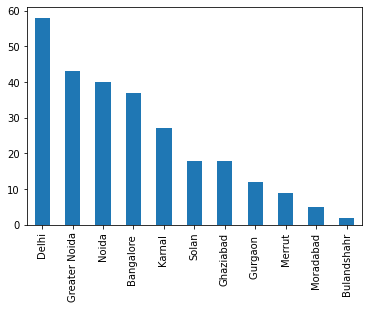

In [110]:
city = df1["3 Which city do you shop online from?"].value_counts()

city.plot(kind = 'bar')
plt.show()

In [111]:
#From above graph we can see people from Metro city forms major part of online shoppers. People from small city forms a very
#small part of ratio.

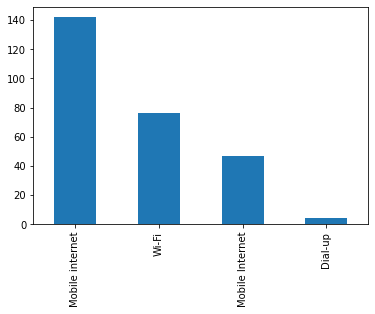

In [112]:
access = df1["7 How do you access the internet while shopping on-line?"].value_counts()

access.plot(kind = 'bar')
plt.show()

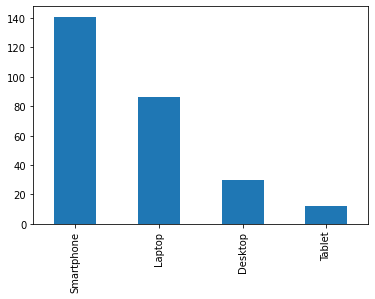

In [113]:
device = df1["8 Which device do you use to access the online shopping?"].value_counts()

device.plot(kind = 'bar')
plt.show()

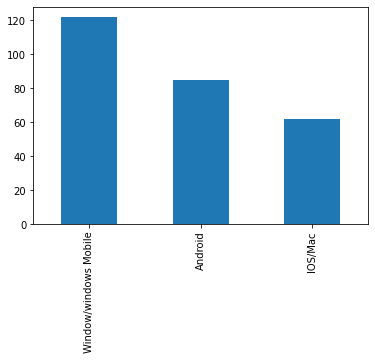

In [114]:
os_system = df1["10 What is the operating system (OS) of your device?\t\t\t\t                                          "].value_counts()

os_system.plot(kind = 'bar')
plt.show()

In [115]:
#From above graph we can see that mobile internet shopping forms major portion of ratio mainly due to its ease of use and 
#radily available mobile apps through which shopping can be done very easily and quickly. 

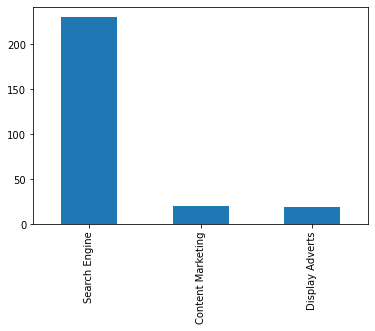

In [116]:
channel = df1["12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   "].value_counts()

channel.plot(kind = 'bar')
plt.show()

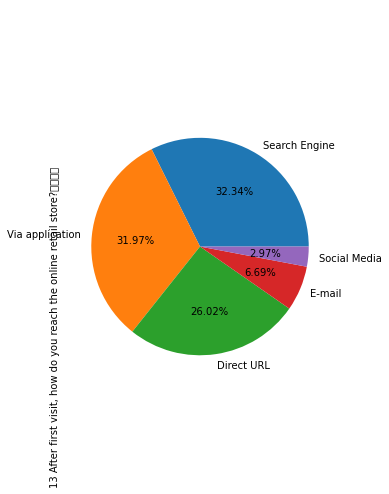

In [152]:
channel_visit = df1['13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   '].value_counts()

channel_visit.plot(kind = 'pie',autopct='%1.2f%%',figsize=(5,5))
plt.show()

In [118]:
#From above 2 graphs we can see that search engine is most preffered online shopping method

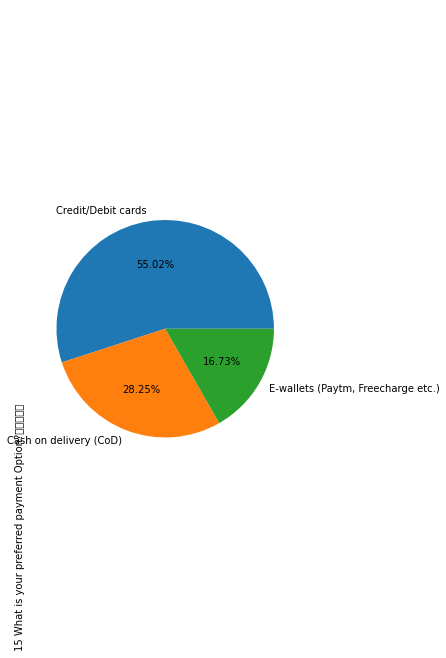

In [151]:
payment = df1['15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               '].value_counts()

payment.plot(kind = 'pie',autopct='%1.2f%%',figsize=(5,5))
plt.show()

In [120]:
#We can see credit/debit cards forms the most preffered payment option for online shopping as it is easily available from banks
# and also is quite old and famous mode of payment as compared to ewallets, paytm, etc mode.
#Cash on delivery must be mainly used in village areas and for items which is quite cheaper. 

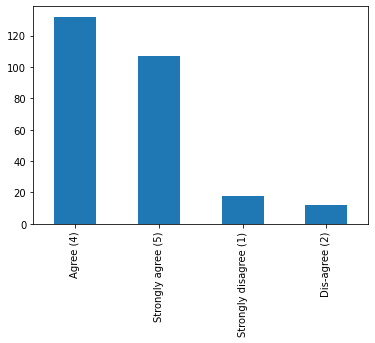

In [121]:
prod_info = df1['21 All relevant information on listed products must be stated clearly'].value_counts()

prod_info.plot(kind = 'bar')
plt.show()

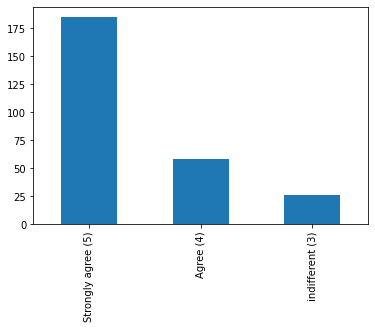

In [122]:
privacy = df1['28 Being able to guarantee the privacy of the customer'].value_counts()

privacy.plot(kind = 'bar')
plt.show()

In [123]:
#Customer privacy forms a very important parameter for online shopping, both for customer satisfaction as well as for 
#customer data security.

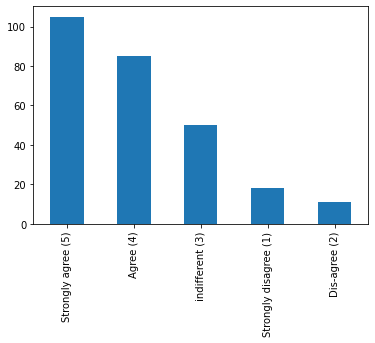

In [124]:
benefit = df1['30 Online shopping gives monetary benefit and discounts'].value_counts()

benefit.plot(kind = 'bar')
plt.show()

In [125]:
#We can see that discounts and benefits offered during online shopping forms a major reason for its preference.

In [126]:
#############Till here we have done analysis on df1 (first 47 columns of original dataset), From here on we will work on
#df2 data set, from column 48 to last column

In [127]:
cData = pd.get_dummies(df2, columns=['From the following, tick any (or all) of the online retailers you have shopped from;                                                                           '])
cData

,Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,...,Which of the Indian online retailer would you recommend to a friend?,"From the following, tick any (or all) of the online retailers you have shopped from; _Amazon.in","From the following, tick any (or all) of the online retailers you have shopped from; _Amazon.in, Flipkart.com","From the following, tick any (or all) of the online retailers you have shopped from; _Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com","From the following, tick any (or all) of the online retailers you have shopped from; _Amazon.in, Flipkart.com, Paytm.com","From the following, tick any (or all) of the online retailers you have shopped from; _Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com","From the following, tick any (or all) of the online retailers you have shopped from; _Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com","From the following, tick any (or all) of the online retailers you have shopped from; _Amazon.in, Flipkart.com, Snapdeal.com","From the following, tick any (or all) of the online retailers you have shopped from; _Amazon.in, Paytm.com","From the following, tick any (or all) of the online retailers you have shopped from; _Amazon.in, Paytm.com, Myntra.com"
0,Paytm.com,Flipkart.com,Flipkart.com,Snapdeal.com,Snapdeal.com,Paytm.com,Paytm.com,Patym.com,Amazon.in,Amazon.in,...,Flipkart.com,0,0,0,0,0,0,0,1,0
1,"Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com","Amazon.in, Myntra.com","Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Myntra.com",Myntra.com,"Amazon.com, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com",Myntra.com,...,"Amazon.in, Myntra.com",0,0,1,0,0,0,0,0,0
2,"Amazon.in, Paytm.com, Myntra.com","Amazon.in, Paytm.com, Myntra.com","Amazon.in, Myntra.com","Amazon.in, Paytm.com, Myntra.com","Amazon.in, Paytm.com","Amazon.in, Paytm.com, Myntra.com","Amazon.com, Paytm.com, Myntra.com","Patym.com, Myntra.com",Amazon.in,Amazon.in,...,"Amazon.in, Paytm.com, Myntra.com",0,0,0,0,0,0,0,0,1
3,"Amazon.in, Flipkart.com, Paytm.com, Myntra.com...","Amazon.in, Flipkart.com, Paytm.com, Myntra.com...","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Snapdeal.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.com, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Snapdeal.com","Amazon.in, Flipkart.com, Myntra.com",...,"Amazon.in, Flipkart.com",0,0,0,0,1,0,0,0,0
4,"Amazon.in, Flipkart.com, Paytm.com, Myntra.com...",Myntra.com,Myntra.com,"Amazon.in, Flipkart.com, Paytm.com, Myntra.com...",Amazon.in,"Amazon.in, Paytm.com, Myntra.com","Amazon.com, Flipkart.com, Paytm.com, Myntra.co...","Amazon.in, Flipkart.com, Patym.com, Myntra.com...",Amazon.in,"Amazon.in, Paytm.com",...,"Amazon.in, Myntra.com",0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.com,Amazon.in,Amazon.in,Amazon.in,...,Amazon.in,1,0,0,0,0,0,0,0,0
265,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,...,Flipkart.com,0,1,0,0,0,0,0,0,0
266,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.com,"Amazon.in, Flipkart.com",Amazon.in,Amazon.in,...,Amazon.in,0,0,0,0,0,0,1,0,0
267,"Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com","Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com","Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com","Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com","Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com","Amazon

In [128]:
df2_easy= df2["Easy to use website or application"].str.split(",",expand=True,)
df2_easy

,0,1,2,3,4
0,Paytm.com,None,None,None,None
1,Amazon.in,Flipkart.com,Myntra.com,Snapdeal.com,None
2,Amazon.in,Paytm.com,Myntra.com,None,None
3,Amazon.in,Flipkart.com,Paytm.com,Myntra.com,Snapdeal.com
4,Amazon.in,Flipkart.com,Paytm.com,Myntra.com,Snapdeal.com
...,...,...,...,...,...
264,Amazon.in,None,None,None,None
265,Flipkart.com,None,None,None,None
266,Amazon.in,None,None,None,None
267,Amazon.in,Flipkart.com,Myntra.com,Snapdeal.com,None


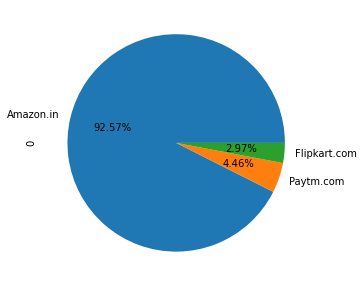

In [129]:
#for i in df2_easy.head(0):
Easy_to_use = df2_easy[0].value_counts()
##.groupby(df2["Easy to use website or application"])
Easy_to_use.plot(kind = 'pie',figsize=(5,5),autopct='%1.2f%%')
plt.show()

In [130]:
#From above pie chart we can see that amazon leads in the category of easy to use.

In [131]:
variety= df2["Wild variety of product on offer"].str.split(",",expand=True,)
variety

,0,1,2,3
0,Flipkart.com,None,None,None
1,Flipkart.com,Myntra.com,None,None
2,Amazon.in,Myntra.com,None,None
3,Amazon.in,Flipkart.com,None,None
4,Myntra.com,None,None,None
...,...,...,...,...
264,Amazon.in,None,None,None
265,Amazon.in,None,None,None
266,Amazon.in,None,None,None
267,Amazon.in,Flipkart.com,Myntra.com,Snapdeal.com


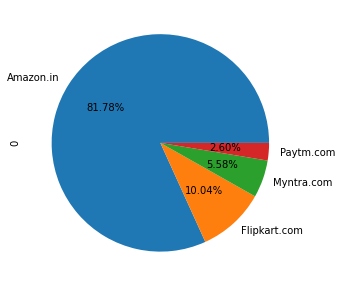

In [132]:
variety = variety[0].value_counts()

variety.plot(kind = 'pie',figsize=(5,5),autopct='%1.2f%%')
plt.show()

In [133]:
#Here again Amazon leads for providing wild varieties of products.

In [134]:
description= df2["Complete, relevant description information of products"].str.split(",",expand=True,)
description

,0,1,2,3,4
0,Snapdeal.com,None,None,None,None
1,Amazon.in,Flipkart.com,Myntra.com,None,None
2,Amazon.in,Paytm.com,Myntra.com,None,None
3,Amazon.in,Flipkart.com,None,None,None
4,Amazon.in,Flipkart.com,Paytm.com,Myntra.com,Snapdeal.com
...,...,...,...,...,...
264,Amazon.in,None,None,None,None
265,Flipkart.com,None,None,None,None
266,Amazon.in,None,None,None,None
267,Amazon.in,Flipkart.com,Myntra.com,Snapdeal.com,None


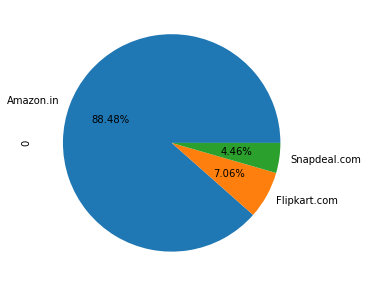

In [135]:
description = description[0].value_counts()

description.plot(kind = 'pie',figsize=(5,5),autopct='%1.2f%%')
plt.show()

In [136]:
Reliability= df2["Reliability of the website or application"].str.split(",",expand=True,)
Reliability

,0,1,2,3
0,Paytm.com,None,None,None
1,Myntra.com,None,None,None
2,Amazon.in,Paytm.com,Myntra.com,None
3,Amazon.in,Flipkart.com,Paytm.com,None
4,Amazon.in,Paytm.com,Myntra.com,None
...,...,...,...,...
264,Amazon.in,None,None,None
265,Flipkart.com,None,None,None
266,Amazon.in,None,None,None
267,Amazon.in,Flipkart.com,Myntra.com,Snapdeal.com


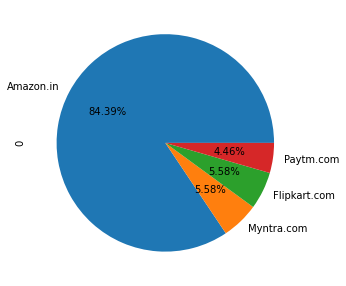

In [137]:
Reliability = Reliability[0].value_counts()

Reliability.plot(kind = 'pie',figsize=(5,5),autopct='%1.2f%%')
plt.show()

In [138]:
payment= df2["Availability of several payment options"].str.split(",",expand=True,)
payment

,0,1,2,3,4
0,Patym.com,None,None,None,None
1,Amazon.in,Flipkart.com,Myntra.com,None,None
2,Patym.com,Myntra.com,None,None,None
3,Amazon.in,Flipkart.com,Myntra.com,None,None
4,Amazon.in,Flipkart.com,Patym.com,Myntra.com,Snapdeal.com
...,...,...,...,...,...
264,Amazon.in,None,None,None,None
265,Flipkart.com,None,None,None,None
266,Amazon.in,Flipkart.com,None,None,None
267,Flipkart.com,Myntra.com,Snapdeal.com,None,None


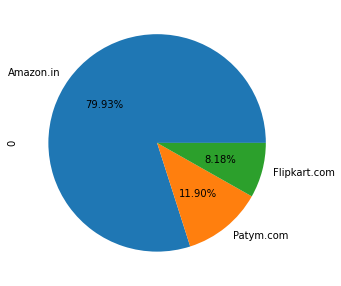

In [139]:
payment = payment[0].value_counts()

payment.plot(kind = 'pie',figsize=(5,5),autopct='%1.2f%%')
plt.show()

In [140]:
Security= df2["Security of customer financial information"].str.split(",",expand=True,)
Security


,0,1,2,3,4
0,Amazon.in,None,None,None,None
1,Myntra.com,None,None,None,None
2,Amazon.in,Paytm.com,Myntra.com,None,None
3,Amazon.in,Flipkart.com,Snapdeal.com,None,None
4,Paytm.com,None,None,None,None
...,...,...,...,...,...
264,Amazon.in,None,None,None,None
265,Flipkart.com,None,None,None,None
266,Amazon.in,None,None,None,None
267,Amazon.in,Flipkart.com,Myntra.com,Snapdeal.com,None


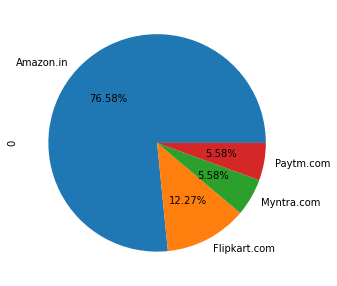

In [141]:
Security = Security[0].value_counts()

Security.plot(kind = 'pie',figsize=(5,5),autopct='%1.2f%%')
plt.show()

In [142]:
Trustworthiness= df2["Perceived Trustworthiness"].str.split(",",expand=True,)
Trustworthiness

,0,1,2,3,4
0,Flipkart.com,None,None,None,None
1,Myntra.com,None,None,None,None
2,Amazon.in,Myntra.com,None,None,None
3,Amazon.in,Flipkart.com,Snapdeal.com,None,None
4,Amazon.in,Myntra.com,None,None,None
...,...,...,...,...,...
264,Amazon.in,None,None,None,None
265,Flipkart.com,None,None,None,None
266,Amazon.in,None,None,None,None
267,Amazon.in,Flipkart.com,Myntra.com,Snapdeal.com,None


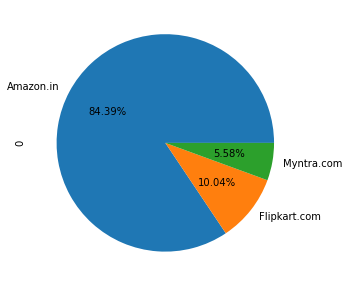

In [143]:
Trustworthiness = Trustworthiness[0].value_counts()

Trustworthiness.plot(kind = 'pie',figsize=(5,5),autopct='%1.2f%%')
plt.show()

In [144]:
#From above 2 pie charts we can see , security and trustworthiness which are very important parimeters for customer retention
#Amazon again is preffered choice of the people.

In [145]:
#Which of the Indian online retailer would you recommend to a friend?

recommend= df2["Which of the Indian online retailer would you recommend to a friend?"].str.split(",",expand=True,)
recommend

,0,1,2,3
0,Flipkart.com,None,None,None
1,Amazon.in,Myntra.com,None,None
2,Amazon.in,Paytm.com,Myntra.com,None
3,Amazon.in,Flipkart.com,None,None
4,Amazon.in,Myntra.com,None,None
...,...,...,...,...
264,Amazon.in,None,None,None
265,Flipkart.com,None,None,None
266,Amazon.in,None,None,None
267,Amazon.in,None,None,None


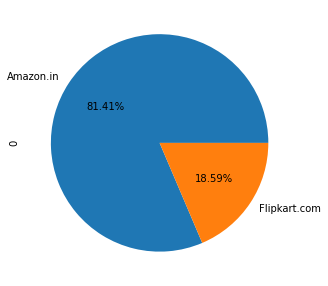

In [146]:
recommend = recommend[0].value_counts()

recommend.plot(kind = 'pie',figsize=(5,5),autopct='%1.2f%%')
plt.show()

In [147]:
#Above pie chart cleary depicts that Amazon is highly recomended online shopping platform from given data.

In [148]:
#since our dataset mostly contains categorical data, outlier detection and removal process cannot be performed on it.
#Also, skewness, curtosis is carried out on numerical data, this is also not possible on our given dataset. 